In [1]:
# Install the required liabraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels as sm

In [2]:
# Read the Data from the local machine
cars = pd.read_csv(r"C:\Users\Bhaskar Kumbhar\ExcelR\Artificial Intelligence Course\Multi Linear Regression\Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
# Check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

## Correlation Matrix

In [6]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


## Preparing a Model

In [7]:
# Build Model    OLS = ORDINARY LEAST SQUARE - GETTING THE MINIMUM VALUE OF THE SQUARED ERROR
import statsmodels.formula.api as smf
model = smf.ols(formula = 'MPG~WT+VOL+SP+HP', data = cars).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.54e-23
Time:                        20:36:27   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Coefficients
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [10]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [11]:
#R suared values
(model.rsquared, model.rsquared_adj)

(0.7705372737359844, 0.7584602881431415)

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

* First, the data values are ordered and cumulative distribution values are calculated.
* A cumulative distribution graph is produced by plotting the ordered data versus the cumulative distribution values.
* The same process is done for a standard normal distribution.
* Once these two cumulative distribution graphs have been generated, data values corresponding to specific quantiles are paired   and plotted in a QQ plot

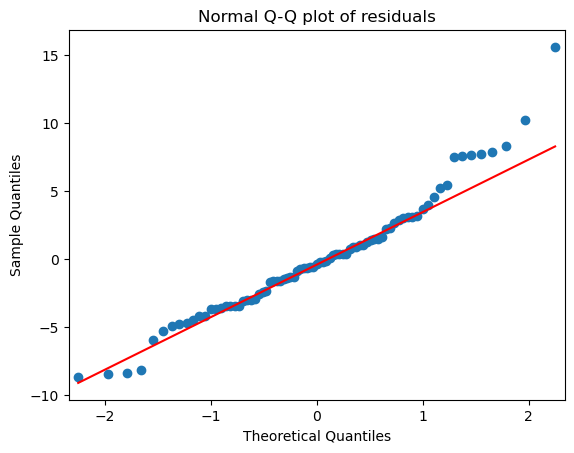

In [12]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 deg. to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [13]:
np.where(model.resid>10)

(array([ 0, 76], dtype=int64),)

## Residual Plot for Homoscedasticity

In [14]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

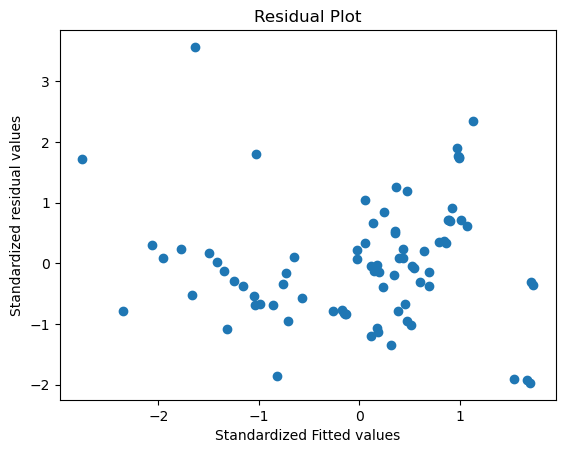

In [15]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Detecting Influencers/Outliers

### Cook's Distance

In [16]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [17]:
(c, _) = model.get_influence().cooks_distance

In [18]:
model.get_influence().cooks_distance

(array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
        2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
        4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
        3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
        1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
        1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
        1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
        3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
        4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
        3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
        2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
        1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
        1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
        1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.466954

In [19]:
#model_influence.cooks_distance

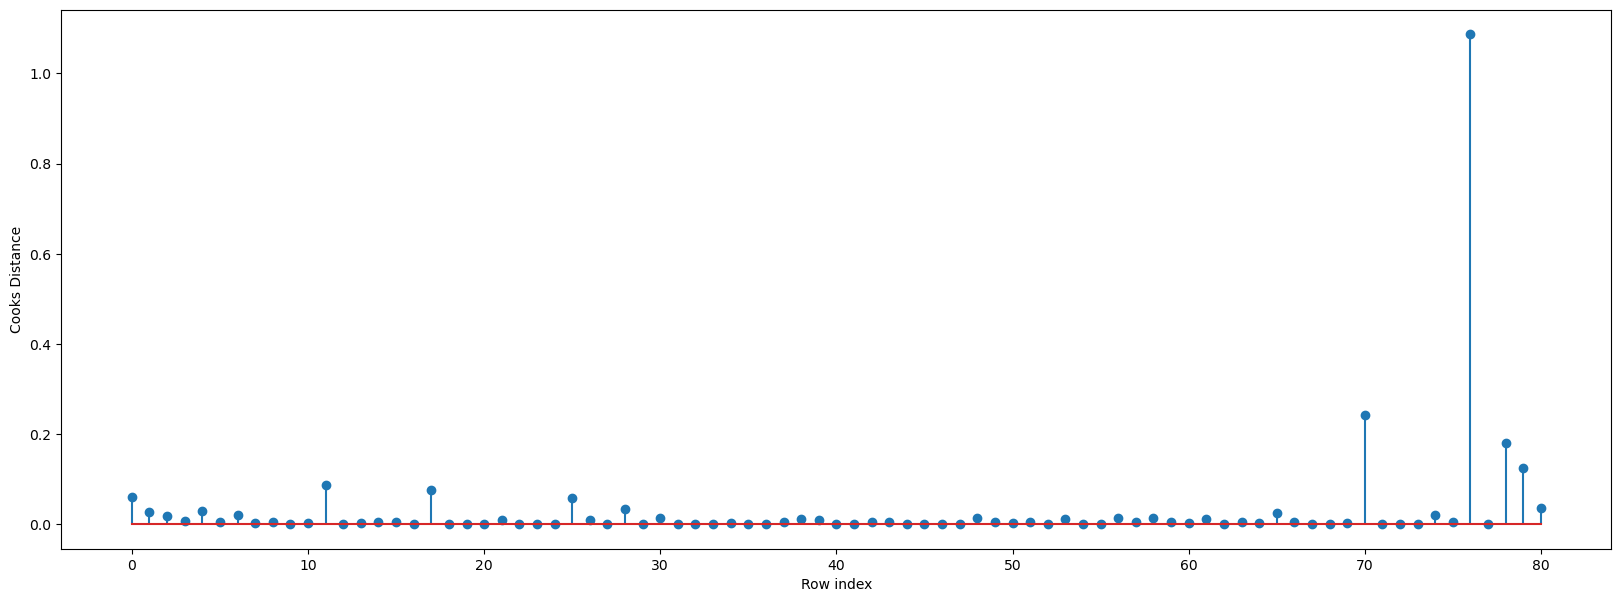

In [20]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [21]:
np.argmax(c)

76

In [22]:
#index and value of influencer where c is more than 1
(np.argmax(c),np.max(c))

(76, 1.0865193998180143)

## High Influence Points 

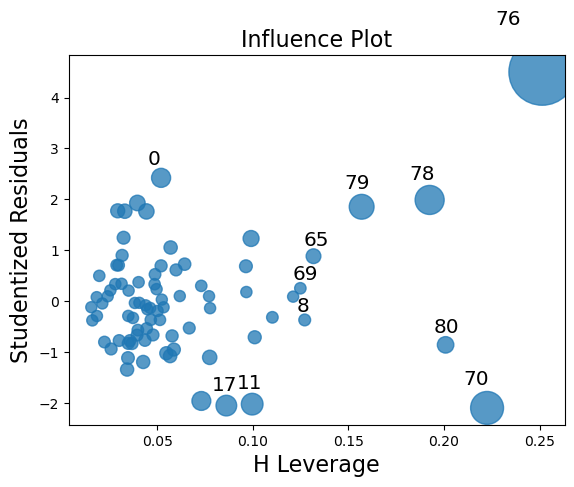

In [23]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [24]:
cars.shape[0]

81

In [25]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.2222222222222222

##### By analysing above plot, it is evident that data point 70 and 76 are the influencers

In [26]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [27]:
# See the differences in HP and other variable values
#cars.head()

## Improving the new Model

In [28]:
# Load the data
cars_new = pd.read_csv(r"C:\Users\Bhaskar Kumbhar\ExcelR\Artificial Intelligence Course\Multi Linear Regression\Cars.csv")

In [29]:
# Discard the data points which are influencers/outliers and reassign the row number(reset_index())
car1 = cars_new.drop(cars_new.index[[70,76]], axis = 0).reset_index()

In [30]:
# Drop the original index
car1 = car1.drop(['index'],axis = 1)

In [31]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


## Build the Model

In [32]:
# Exclude variable 'WT' and generate R-squared and AIC Values
final_ml_V = smf.ols('MPG~VOL+SP+HP', data = car1).fit()

In [33]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     111.0
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.65e-27
Time:                        20:36:29   Log-Likelihood:                -219.06
No. Observations:                  79   AIC:                             446.1
Df Residuals:                      75   BIC:                             455.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5275     13.051      1.956      0.054      -0.471      51.526
VOL           -0.1825      0.023     -8.012      0.000      -0.228      -0.137
SP             0.4415      0.141      3.124      0.003       0.160       0.723
HP            -0.2291      0.035     -6.592      0.000      -0.298      -0.160
==============================================================================
Omnibus:                        6.541   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.833
Skew:                           0.620   Prob(JB):                       0.0541
Kurtosis:                       3.485   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8161692010376007, 446.11722639447726)

In [35]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [36]:
#final_ml_W.summary()

In [37]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8160034320495305, 446.1884323575031)

### Using Cook's Distance 

In [38]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

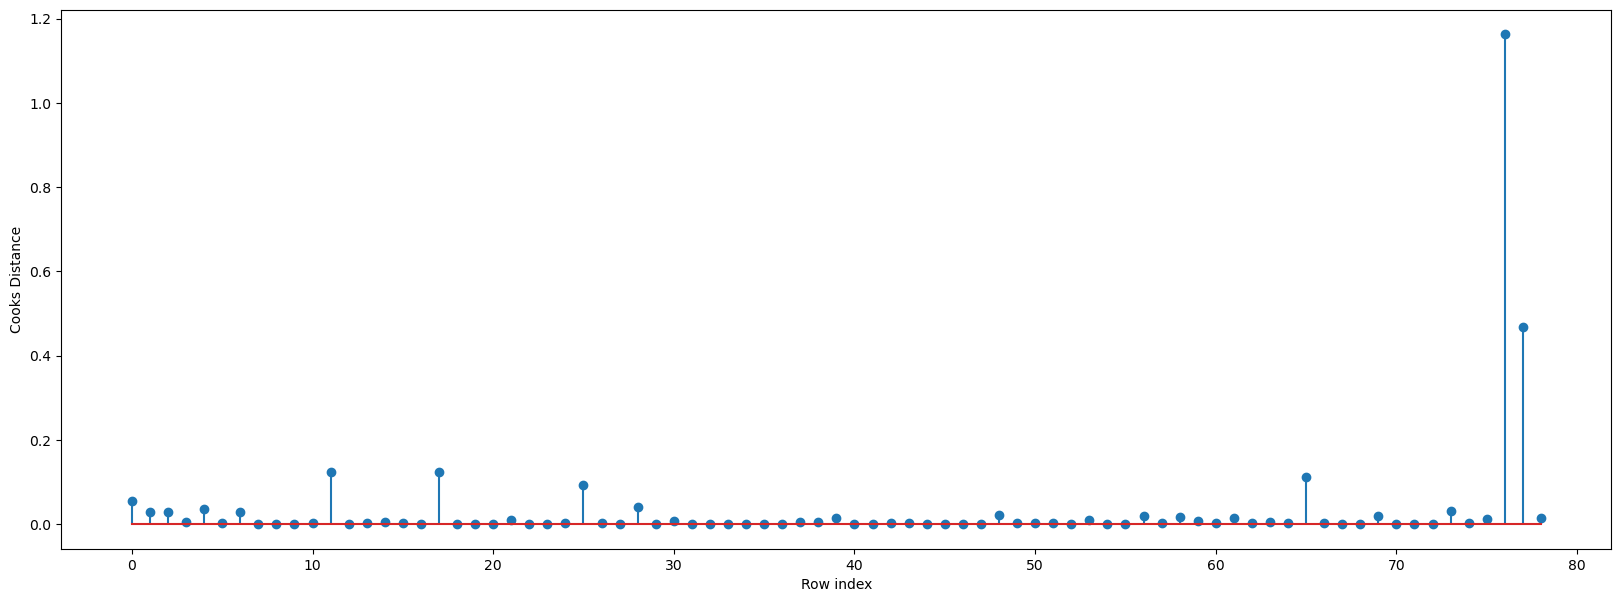

In [39]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [40]:
#index of the data points where c is more than 1
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135222)

In [41]:
#Drop 76 and 77 observations
car2=car1.drop(car1.index[[76,77]],axis=0)

In [42]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [43]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [44]:
car4=car3.drop(['index'],axis=1)

In [45]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [46]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [47]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     158.6
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           6.81e-32
Time:                        20:36:29   Log-Likelihood:                -200.71
No. Observations:                  77   AIC:                             409.4
Df Residuals:                      73   BIC:                             418.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2974     11.336      2.232      0.029       2.706      47.889
VOL           -0.1362      0.021     -6.366      0.000      -0.179      -0.094
SP             0.4335      0.122      3.560      0.001       0.191       0.676
HP            -0.2635      0.031     -8.634      0.000      -0.324      -0.203
==============================================================================
Omnibus:                        9.478   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.184
Skew:                           0.770   Prob(JB):                       0.0101
Kurtosis:                       3.703   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

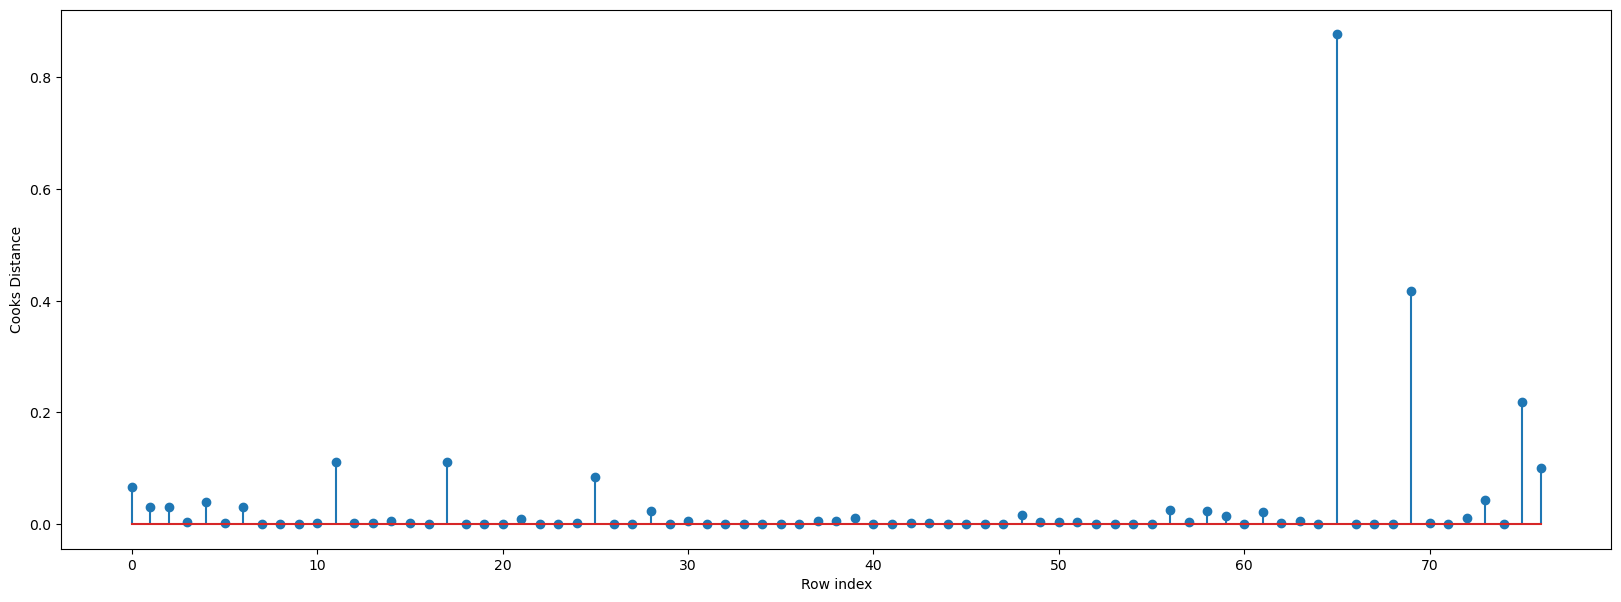

In [49]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [50]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296762)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [51]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [52]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8669636111859063, 409.4153062719508)

In [53]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


# PREDICTING FOR THE NEW DATA

In [54]:
#New data for prediction
new_data=pd.DataFrame({'HP':[40,45],
                       "VOL":[95,98],
                       "SP":[102,91]})

In [55]:
new_data

,HP,VOL,SP
0,40,95,102
1,45,98,91


In [56]:
final_ml_V.predict(new_data)

0    46.035594
1    39.540791
dtype: float64

In [57]:
# 25.2974	
# VOL-0.1362
# SP	0.4335	
# HP	-0.2635

In [58]:
mpg_pred = -0.1362*95+0.4335*102-0.2635*40+25.2974
mpg_pred

46.035399999999996